PHASE2 FINALLY

In [2]:
# Load your data
import pandas as pd
df = pd.read_csv("cleaned_ph.csv")

In [3]:
display(df.head(30))

,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,nosOfSubdomain,label,domainLen_scaled,ranking_scaled
0,0.0,0,0.000000,0,0.0,0.0,1.0,0.058824,1,0.668493,1.000000
1,0.0,1,0.465079,0,0.0,0.0,0.0,0.058824,0,0.422565,0.744714
2,0.0,0,0.000000,1,0.0,0.0,0.0,0.029412,1,0.490279,1.000000
3,0.0,0,0.000000,0,0.0,0.0,0.0,0.088235,0,0.612503,0.529065
4,0.0,1,0.069778,0,0.0,0.0,0.0,0.029412,1,0.583340,1.000000
5,0.0,1,0.767365,0,0.0,0.0,0.0,0.058824,0,0.640866,1.000000
6,0.0,0,0.000000,0,0.0,0.0,0.0,0.088235,0,0.668493,0.606706
7,0.0,0,0.000000,0,0.0,0.0,0.0,0.088235,0,0.522319,1.000000
8,0.0,1,0.395365,0,0.0,0.0,0.0,0.058824,0,0.457074,1.000000
9,0.0,0,0.000000,0,0.0,0.0,0.0,0.058824,0,0.386585,0.427071


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81524 entries, 0 to 81523
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   isIp              81524 non-null  float64
 1   valid             81524 non-null  int64  
 2   activeDuration    81524 non-null  float64
 3   urlLen            81524 non-null  int64  
 4   is@               81524 non-null  float64
 5   isredirect        81524 non-null  float64
 6   haveDash          81524 non-null  float64
 7   nosOfSubdomain    81524 non-null  float64
 8   label             81524 non-null  int64  
 9   domainLen_scaled  81524 non-null  float64
 10  ranking_scaled    81524 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 6.8 MB


In [5]:
df.shape

(81524, 11)

In [6]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['label'])
y = df['label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


why not pca?
PCA is not suitable for phishing dataset mainly because:
Mostfeatures are binary or categorical, not continuous.
need interpretability, which PCA removes.
Important domain signals may be lost or distorted.

used the "L1 regularization" (Lasso) method because it performs both feature selection and regularization by shrinking less important feature coefficients to exactly zero, effectively removing them from the model. This helps in identifying the most relevant features while also reducing model complexity and overfitting.

In [9]:
#L1 REGULARISATION
from sklearn.linear_model import LogisticRegression

# Fit the model
model = LogisticRegression(penalty='l1', solver='liblinear',  C=0.01)
model.fit(X, y)

# Get boolean mask of selected features
selected_mask = model.coef_[0] != 0

# Get selected feature names
selected_features = X.columns[selected_mask]

# Display selected features
print("Selected Features:")
print(selected_features.tolist())


Selected Features:
['valid', 'activeDuration', 'urlLen', 'isredirect', 'haveDash', 'nosOfSubdomain', 'domainLen_scaled', 'ranking_scaled']


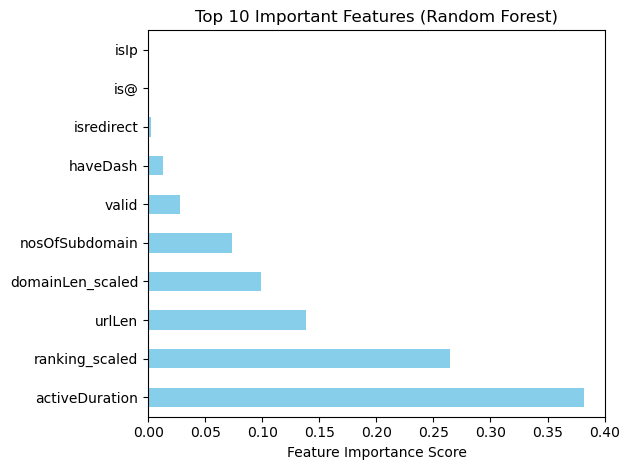


Top 10 Features (Random Forest):
 activeDuration      0.381543
ranking_scaled      0.264088
urlLen              0.138271
domainLen_scaled    0.098882
nosOfSubdomain      0.073661
valid               0.027782
haveDash            0.012800
isredirect          0.002288
is@                 0.000638
isIp                0.000048
dtype: float64


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
# Random Forest Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh', title='Top 10 Important Features (Random Forest)', color='skyblue')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()

print("\nTop 10 Features (Random Forest):\n", feat_imp.nlargest(10))

----COMMON FEATURES FROM BOTH THE METHODS----
activeDuration     
ranking_scaled     
urlLen              
domainLen_scaled    
nosOfSubdomain      
valid             
haveDash           
isredirect  

L1 (Lasso) is best for linear models.
Random Forest Importance excels in non-linear problems and model ranking.
Combining both can yield the most robust feature selection.

models i have selected-

RF: Strong generalization + robustness.
XGBoost: Precision and fine-tuned learning from errors.
SVM: Good margin-based classifier for structured data.

RANDOM FOREST

Accuracy: 0.9405703771849127

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      6777
           1       0.94      0.96      0.95      9528

    accuracy                           0.94     16305
   macro avg       0.94      0.94      0.94     16305
weighted avg       0.94      0.94      0.94     16305



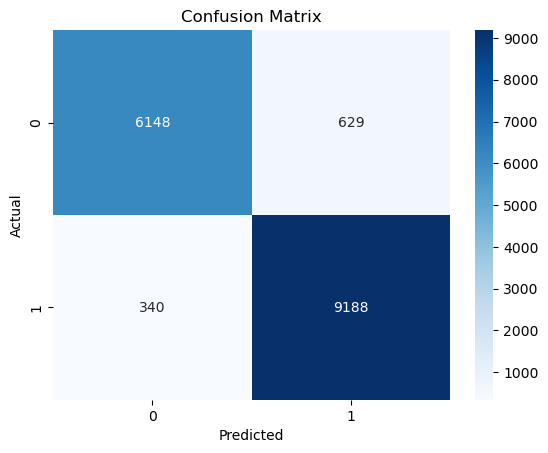

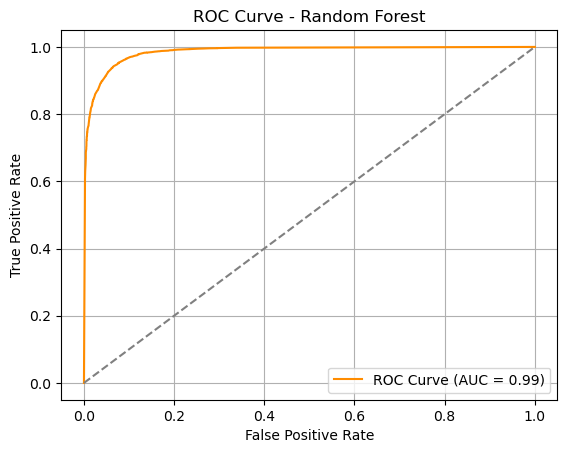

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Define your feature set and target
selected_features = ['activeDuration', 'ranking_scaled', 'urlLen', 'domainLen_scaled',
                     'nosOfSubdomain', 'valid', 'haveDash', 'isredirect']

X_selected = X[selected_features]
y_selected = y  # your target column, assumed to be called 'label'

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # Probability of positive class

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


 Precision
Definition: Measures the accuracy of positive predictions (how many predicted positives are actually correct).

Recall (Sensitivity or True Positive Rate)
Definition: Measures the ability to find all positive instances (how many actual positives were correctly predicted).

F1 Score
Definition: The harmonic mean of precision and recall, providing a single balanced metric (especially useful when class distribution is imbalanced).

SVM

Accuracy: 0.8842914383841688

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86     10118
           1       0.91      0.89      0.90     14340

    accuracy                           0.88     24458
   macro avg       0.88      0.88      0.88     24458
weighted avg       0.89      0.88      0.88     24458



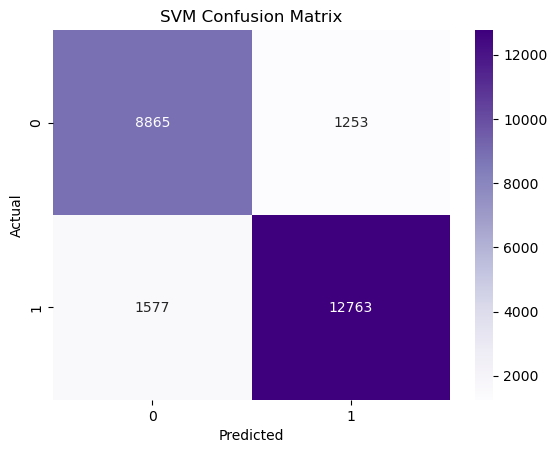

In [18]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define selected features and target
selected_features = ['activeDuration', 'ranking_scaled', 'urlLen', 'domainLen_scaled',
                     'nosOfSubdomain', 'valid', 'haveDash', 'isredirect']

X_selected = X[selected_features]
y_selected = y  # assuming 'y' is already your label column

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.3, random_state=42)

# Step 3: Feature scaling (very important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train Linear SVM
svm_model = LinearSVC(C=1.0, class_weight='balanced', max_iter=10000, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Step 5: Predict and evaluate
y_pred = svm_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()


XgBOOST 

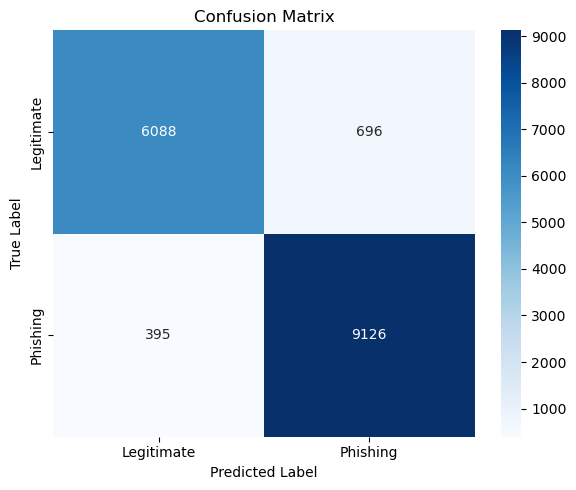

 Accuracy: 0.9330880098129408

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      6784
           1       0.93      0.96      0.94      9521

    accuracy                           0.93     16305
   macro avg       0.93      0.93      0.93     16305
weighted avg       0.93      0.93      0.93     16305

Confusion Matrix:
 [[6088  696]
 [ 395 9126]]

 ROC AUC Score: 0.9822


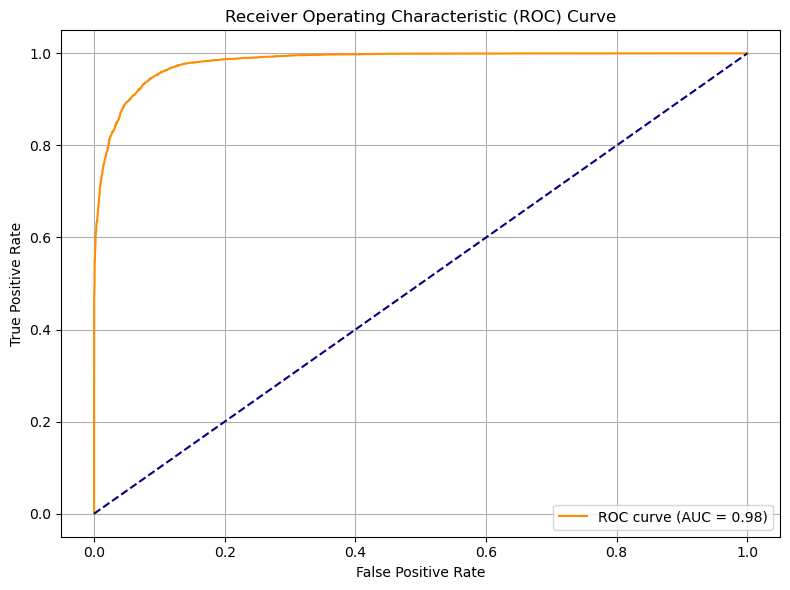

In [20]:
# Import Required Libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt



#  Define features and target
selected_features = ['activeDuration', 'ranking_scaled', 'urlLen', 
                     'domainLen_scaled', 'nosOfSubdomain', 
                     'valid', 'haveDash', 'isredirect']

X = df[selected_features]
y = df['label']  # Replace 'target' with the name of your label column

#  Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42, stratify=y)

#  Train the XGBoost classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

#  Predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # for ROC AUC

# Import additional library
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Phishing'], 
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


#  Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#  ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\n ROC AUC Score: {roc_auc:.4f}")

#  Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()




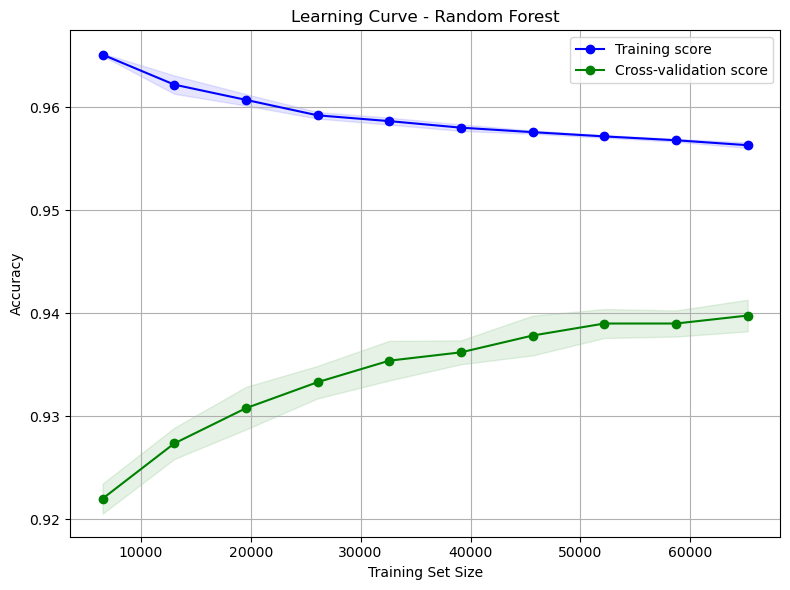

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Reuse your features and labels
X_selected = X[selected_features]
y_selected = y

# Define the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_selected, y_selected, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate means and standard deviations
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation score')

# Fill error bands
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='green')

plt.title('Learning Curve - Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


High Training Accuracy, Slightly Lower CV Accuracy shows slight overfitting
The training accuracy starts very high (~0.967) and slightly declines as the training size increases, settling around ~0.958.
The cross-validation accuracy starts lower (~0.922) and improves steadily with more data, reaching ~0.939.

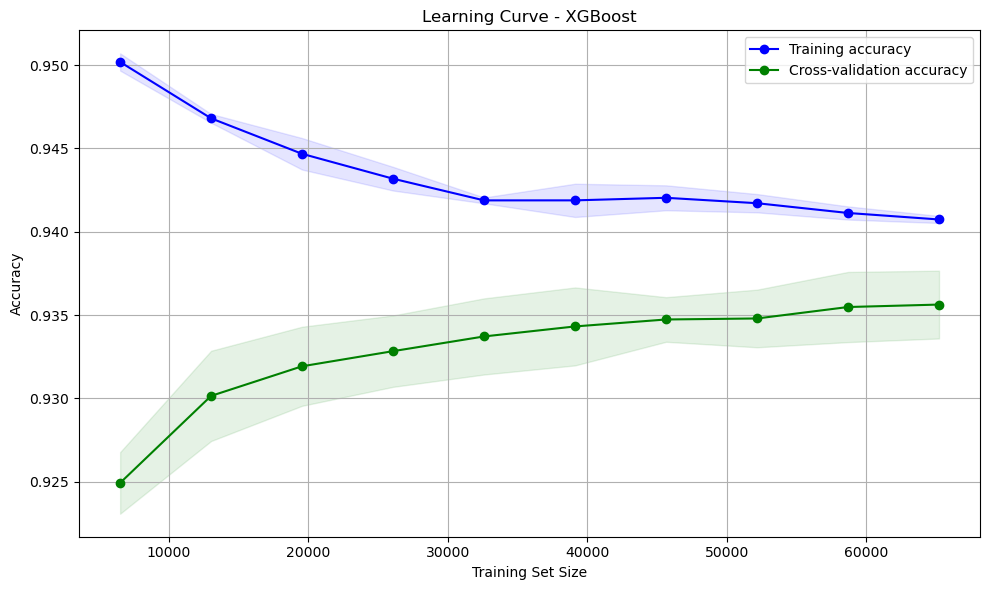

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.model_selection import train_test_split

selected_features = ['activeDuration', 'ranking_scaled', 'urlLen','domainLen_scaled', 'nosOfSubdomain', 'valid', 'haveDash', 'isredirect']

X = df[selected_features]
y = df['label']  

#  Define the model
model = XGBClassifier(eval_metric='logloss', random_state=42)

#  Learning curve calculation
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#  Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title('Learning Curve - XGBoost')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


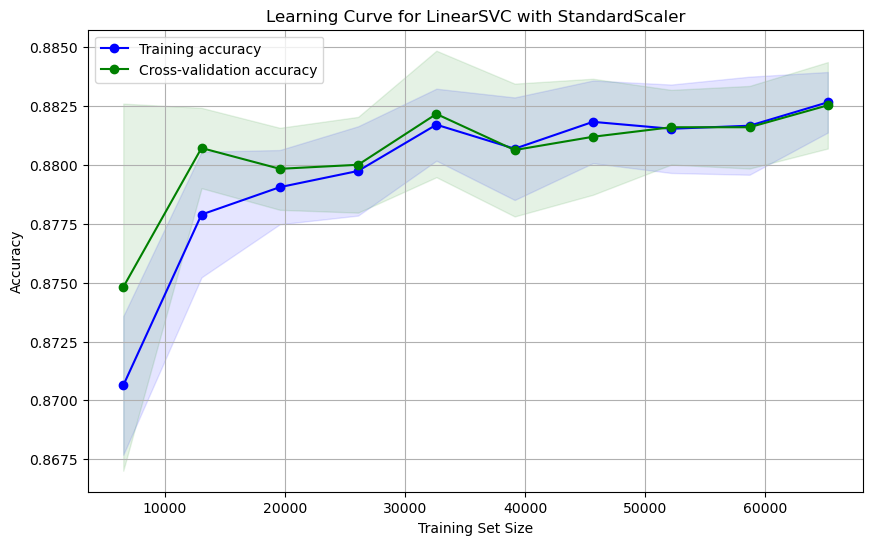

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Create pipeline: StandardScaler + LinearSVC
pipeline = make_pipeline(StandardScaler(), LinearSVC(C=1.0, class_weight='balanced', max_iter=10000, random_state=42))

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_selected, y_selected,
    cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Plotting
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve for LinearSVC with StandardScaler')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()



The graph shows that the LinearSVC model is performing well, with training and test accuracy both around 88%. The small gap between them means the model is not overfitting. As we add more data, the accuracy improves slightly and then levels off. This means the model is already doing a good job with the current data.


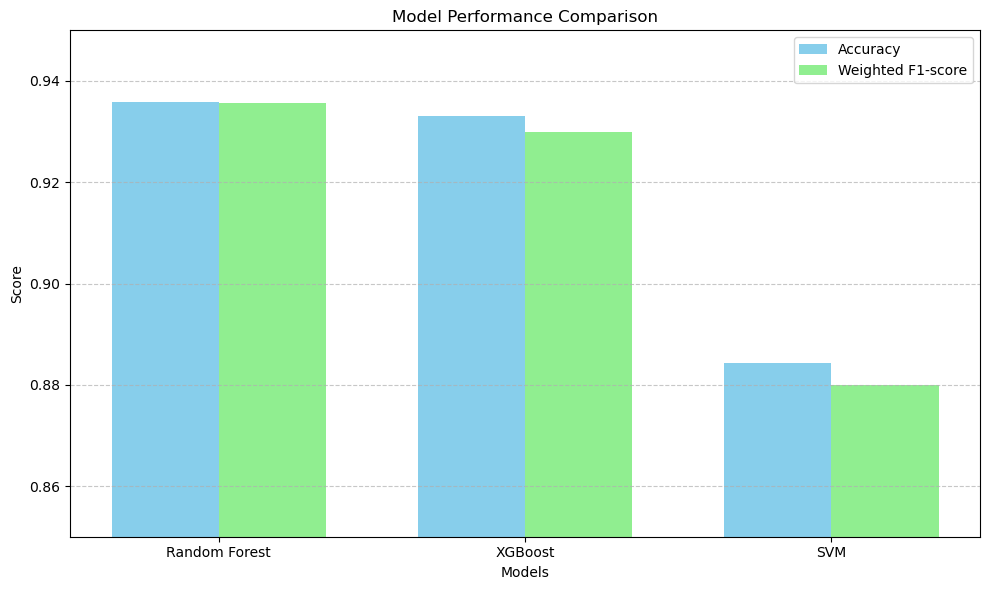

In [26]:
import matplotlib.pyplot as plt

# Model performance data
models = ['Random Forest', 'XGBoost', 'SVM']
accuracies = [0.9358, 0.9331, 0.8843]
f1_scores = [0.9356, 0.93, 0.88]

x = range(len(models))

# Bar width
width = 0.35

# Plotting
plt.figure(figsize=(10, 6))
plt.bar([i - width/2 for i in x], accuracies, width=width, label='Accuracy', color='skyblue')
plt.bar([i + width/2 for i in x], f1_scores, width=width, label='Weighted F1-score', color='lightgreen')

# Labels and legend
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.ylim(0.85, 0.95)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Best model: XgBoost

Best Generalization:

   Lowest train-validation gap.
   F1 scores consistent across both classes.

Robustness to Overfitting:

   Built-in regularization (L1/L2).
   Boosting reduces error iteratively.

Learning Curve Stability:

  Indicates model has learned all it can from current data — no benefit from retraining or deeper trees without feature improvements.

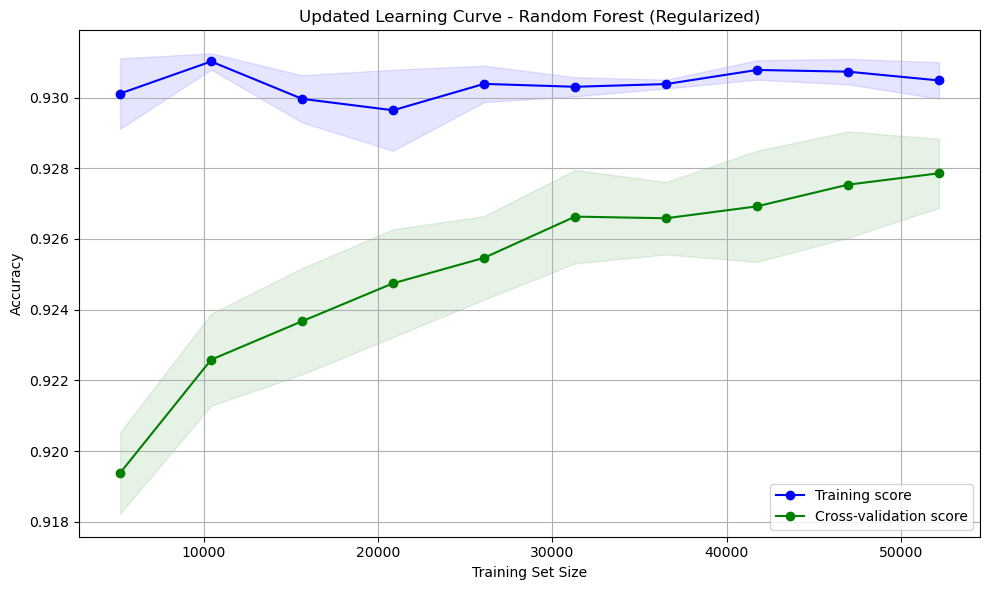

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, train_test_split

# Split your data (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with reduced complexity
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train,
    cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Calculate means and std deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

plt.title('Updated Learning Curve - Random Forest (Regularized)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

 n_estimators=100 --> More trees reduce variance (improve generalization) by averaging predictions.
    max_depth=10 -->Deeper trees can memorize noise in the training data (overfitting).
    min_samples_split=10 -->Higher values prevent splits on small, noisy groups
    min_samples_leaf=5 --> Prevents leaves with very few samples (which are likely noise
  

 Updated Test Accuracy: 0.9274
 Weighted F1 Score: 0.9272

 Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      6777
           1       0.93      0.95      0.94      9528

    accuracy                           0.93     16305
   macro avg       0.93      0.92      0.92     16305
weighted avg       0.93      0.93      0.93     16305



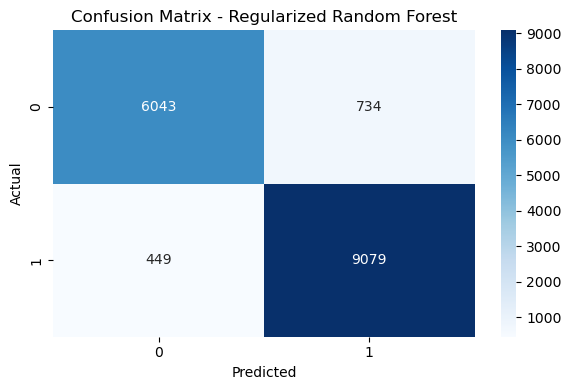

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model on full training data
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(" Updated Test Accuracy:", round(accuracy, 4))

# F1 Score (weighted)
f1 = f1_score(y_test, y_pred, average='weighted')
print(" Weighted F1 Score:", round(f1, 4))

# Classification Report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Regularized Random Forest')
plt.tight_layout()
plt.show()


Accuracy: 0.9330880098129408

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      6784
           1       0.93      0.96      0.94      9521

    accuracy                           0.93     16305
   macro avg       0.93      0.93      0.93     16305
weighted avg       0.93      0.93      0.93     16305

Confusion Matrix:
 [[6088  696]
 [ 395 9126]]


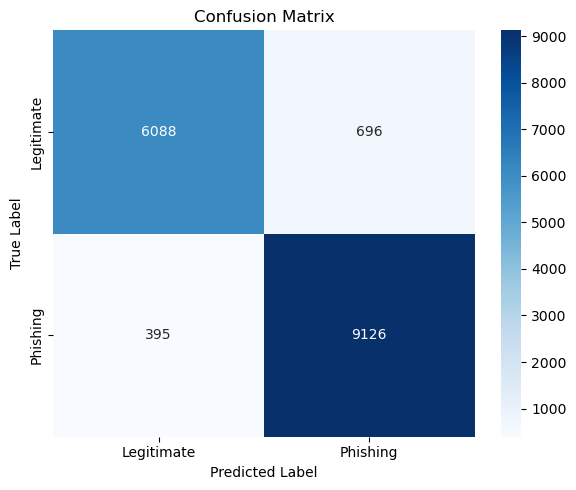


ROC AUC Score: 0.9822


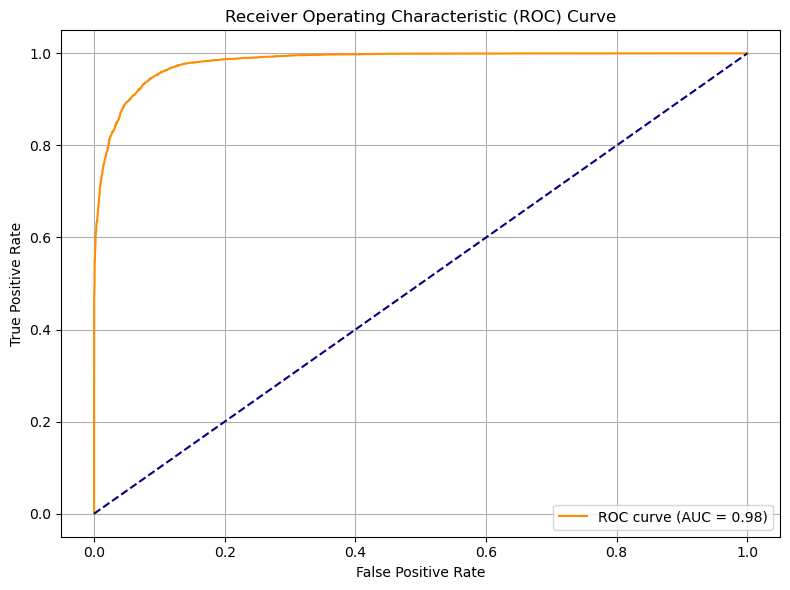


Enter feature values for prediction:


activeDuration:  0
ranking_scaled:  1
urlLen:  0
domainLen_scaled:  0.668493
nosOfSubdomain:  0.058824
valid (0 or 1):  0
haveDash (0 or 1):  1
isredirect (0 or 1):  0



Predicted Label: 1 (Phishing)
Prediction Confidence (Phishing Probability): 0.8220


In [52]:
# Import Required Libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
selected_features = ['activeDuration', 'ranking_scaled', 'urlLen', 
                     'domainLen_scaled', 'nosOfSubdomain', 
                     'valid', 'haveDash', 'isredirect']

X = df[selected_features]
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

# Train the XGBoost classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # for ROC AUC

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Phishing'], 
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Predict Label from User Input ---
def predict_url_label():
    print("\nEnter feature values for prediction:")
    activeDuration = float(input("activeDuration: "))
    ranking_scaled = float(input("ranking_scaled: "))
    urlLen = int(input("urlLen: "))
    domainLen_scaled = float(input("domainLen_scaled: "))
    nosOfSubdomain = float(input("nosOfSubdomain: "))  # This must be float
    valid = int(input("valid (0 or 1): "))
    haveDash = int(input("haveDash (0 or 1): "))
    isredirect = int(input("isredirect (0 or 1): "))

    input_data = pd.DataFrame([[
        activeDuration, ranking_scaled, urlLen,
        domainLen_scaled, nosOfSubdomain,
        valid, haveDash, isredirect
    ]], columns=selected_features)

    predicted_label = xgb_model.predict(input_data)[0]
    confidence = xgb_model.predict_proba(input_data)[0][1]

    print(f"\nPredicted Label: {predicted_label} ({'Phishing' if predicted_label == 1 else 'Legitimate'})")
    print(f"Prediction Confidence (Phishing Probability): {confidence:.4f}")

# Call the input prediction function
predict_url_label()
